# Text Processing - LDA and BERTopic Topic Modeling
In this section, we apply two topic modeling approaches — LDA and BERTopic — to analyze themes across U.S. presidential State of the Union speeches. By comparing the extracted topics and their visualizations, we evaluate how each method captures semantic patterns in the text.

In [2]:
import warnings
warnings.filterwarnings("ignore") # remove warning messages

from spacy import displacy
from bertopic import BERTopic
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis
import pyLDAvis.gensim_models

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-dark') 

We load the full corpus of U.S. State of the Union speeches from 1790 to 2024. This dataset includes each president, year, full speech text, and corresponding word count.

In [4]:
sou = pd.read_csv("data/SOTU.csv")
sou

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169
...,...,...,...,...
241,George Washington,1791.0,\nFellow-Citizens of the Senate and House of R...,2264
242,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
243,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
244,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069


In [5]:
import spacy
from tqdm import tqdm
from collections import Counter

nlp = spacy.load("en_core_web_sm")

## LDA
To prepare the data for topic modeling, we first preprocess each speech by removing stopwords and punctuation, then lemmatizing tokens to unify word forms (e.g., “states” → “state”). Using these cleaned tokens, we build a dictionary and convert each document into a bag-of-words representation. This representation allows the LDA model to identify patterns of word co-occurrence and extract latent topics across the speeches.

In [6]:
def preprocess_text(text): 
    doc = nlp(text) 
    return [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space and len(token.lemma_) > 3]

In [7]:
processed_docs = sou['Text'].apply(preprocess_text)

In [8]:
# Build dictionary from processed_docs, which is a list of tokens extracted from our speeches

from gensim.corpora import Dictionary
dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [9]:
# train LDA model with 18 topics
from gensim.models import LdaModel

lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=18,
    random_state=42
)

The following output lists the top 10 keywords per topic, allowing us to interpret the themes identified by the model.

In [10]:
# print the top 10 words for each topic
for topic_id in range(18):
    print(f"Topic {topic_id}:")
    print(lda_model.print_topic(topic_id, topn=10))
    print()

Topic 0:
0.012*"government" + 0.008*"united" + 0.008*"states" + 0.007*"country" + 0.007*"year" + 0.006*"congress" + 0.005*"public" + 0.004*"great" + 0.004*"people" + 0.004*"nation"

Topic 1:
0.009*"year" + 0.008*"government" + 0.008*"people" + 0.007*"states" + 0.006*"congress" + 0.006*"country" + 0.005*"great" + 0.005*"nation" + 0.005*"united" + 0.005*"time"

Topic 2:
0.008*"year" + 0.007*"states" + 0.007*"government" + 0.006*"congress" + 0.006*"united" + 0.005*"people" + 0.005*"great" + 0.004*"public" + 0.004*"service" + 0.004*"increase"

Topic 3:
0.010*"year" + 0.009*"states" + 0.008*"government" + 0.007*"congress" + 0.007*"great" + 0.006*"nation" + 0.005*"united" + 0.005*"time" + 0.005*"people" + 0.005*"country"

Topic 4:
0.011*"government" + 0.008*"states" + 0.007*"year" + 0.007*"united" + 0.007*"congress" + 0.006*"country" + 0.005*"public" + 0.005*"nation" + 0.005*"people" + 0.004*"great"

Topic 5:
0.012*"year" + 0.008*"government" + 0.007*"nation" + 0.007*"united" + 0.006*"countr

In [11]:
# print the topic distribution for the first speech
first_doc_topics = lda_model.get_document_topics(corpus[0])
first_doc_topics

[(1, np.float32(0.019613598)),
 (3, np.float32(0.021757675)),
 (6, np.float32(0.021925695)),
 (7, np.float32(0.9343351))]

To better interpret the LDA model beyond raw topic-word lists, we used pyLDAvis to visualize the topics in a 2-dimensional semantic space. Each circle represents one topic, where:

- The size of the circle reflects the prevalence of the topic across the corpus, and

- The distance between circles indicates how distinct the topics are from one another.

In [12]:
# make a visualization using pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(vis, "outputs/p3_lda_vis.html")
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.000318  0.003795       1        1  21.972104
0      0.005459  0.001584       2        1  21.915564
10    -0.001930  0.000058       3        1  17.025325
7     -0.001968  0.003789       4        1   9.414606
3     -0.004466  0.002130       5        1   6.872681
8      0.006430 -0.000534       6        1   5.132954
16    -0.001952  0.001561       7        1   3.870633
4      0.005082 -0.001057       8        1   3.237185
12     0.002609  0.000544       9        1   2.262527
9      0.002564 -0.000885      10        1   2.222927
2     -0.001182 -0.000364      11        1   2.198004
17    -0.001606  0.001720      12        1   2.154839
13    -0.000616 -0.000664      13        1   0.749428
1     -0.005639 -0.001971      14        1   0.368789
11     0.004520 -0.002598      15        1   0.342270
5     -0.001600  0.000196      16        1   0.202704
15    -0.000319 -0.002486      17        1   0.033061
14    -0.005068 -0.004818      18        1   0.024399, topic_info=            Term         Freq        Total Category  logprob  loglift
1525  government  8605.000000  8605.000000  Default  30.0000  30.0000
1250        year  6457.000000  6457.000000  Default  29.0000  29.0000
1066      states  6552.000000  6552.000000  Default  28.0000  28.0000
223     congress  5381.000000  5381.000000  Default  27.0000  27.0000
246      country  4889.000000  4889.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
1065       state     0.554147  2692.657455  Topic18  -5.8787  -0.1702
856      present     0.556185  2795.374842  Topic18  -5.8750  -0.2040
958        right     0.516932  2585.670714  Topic18  -5.9482  -0.1992
5000     subject     0.454733  1962.017590  Topic18  -6.0764  -0.0514
801        peace     0.454171  2103.466126  Topic18  -6.0776  -0.1222

[1678 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
9256      1  0.152345     --to
9256      2  0.152345     --to
9256      3  0.152345     --to
9256      4  0.152345     --to
9256      5  0.076172     --to
...     ...       ...      ...
1250     17  0.000310     year
1250     18  0.000155     year
7120      1  0.235750  yeltsin
7120      2  0.235750  yeltsin
7120      3  0.235750  yeltsin

[7389 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 1, 11, 8, 4, 9, 17, 5, 13, 10, 3, 18, 14, 2, 12, 6, 16, 15])

The pyLDAvis visualization helps interpret the learned LDA topics. Each bubble on the left represents a topic, where the size reflects its prevalence across the corpus and the proximity between bubbles indicates how similar or different the topics are. For example, Topics 1 and 4 appear close together, suggesting overlapping vocabulary related to government and national affairs, whereas Topics 14 and 18 are more isolated, indicating more distinct themes.

The bar chart on the right lists the top-30 most relevant terms for the selected topic. When hovering over a term, the red bars indicate how much that word accounts for in the entire corpus, allowing us to see which terms are globally dominant across all speeches. This helps us not only identify the main theme of each topic (e.g., government, congress, people), but also compare topics by recognizing which words are broadly common versus uniquely concentrated within a specific theme.

## BERTopic

In [13]:
docs = sou['Text'].to_list()

In [20]:
# train the model
topic_model = BERTopic(min_topic_size=3)
topics, probs = topic_model.fit_transform(docs)
vectorizer_model = CountVectorizer(stop_words="english", ngram_range=(1, 3))
topic_model.update_topics(docs, vectorizer_model=vectorizer_model)

The table below summarizes the topics extracted by BERTopic.

After applying additional preprocessing — including English stopword removal and the use of a custom CountVectorizer — the BERTopic results became more coherent and interpretable. Unlike the initial output where many topics were dominated by identical high-frequency words, the updated topic representations now contain more meaningful multi-word expressions (e.g., government, united states; people, world, america; congress, public, law).

In [21]:
# output the top 10 words for each topic - hint see get_topic_info
topic_info = topic_model.get_topic_info()
topic_info

,Topic,Count,Name,Representation,Representative_Docs
0,-1,52,-1_government_states_united_united states,"[government, states, united, united states, co...",[\nJump toPart II |Part III\nPart 1. [On Our F...
1,0,87,0_people_world_new_america,"[people, world, new, america, american, years,...","[\nMr. President, Mr. Speaker, Members of the ..."
2,1,17,1_states_government_united_united states,"[states, government, united, united states, co...",[\nFellow-Citizens of the Senate and House of ...
3,2,10,2_government_great_work_congress,"[government, great, work, congress, public, la...",[\nTo the Senate and House of Representatives:...
4,3,9,3_government_states_united states_united,"[government, states, united states, united, co...",[\nTo the Senate and House of Representatives:...
5,4,9,4_states_united states_united_government,"[states, united states, united, government, co...",[\nTo the Senate and House of Representatives:...
6,5,9,5_states_united states_united_war,"[states, united states, united, war, british, ...",[\nThe Senate and House of Representatives of ...
7,6,9,6_states_government_congress_united,"[states, government, congress, united, united ...",[\nFellow-Citizens of the Senate and of the Ho...
8,7,7,7_states_government_united_united states,"[states, government, united, united states, co...",[\nFellow-Citizens of the Senate and of the Ho...
9,8,6,8_government_states_public_general,"[government, states, public, general, country,...",[\nFellow Citizens of the Senate and of the Ho...


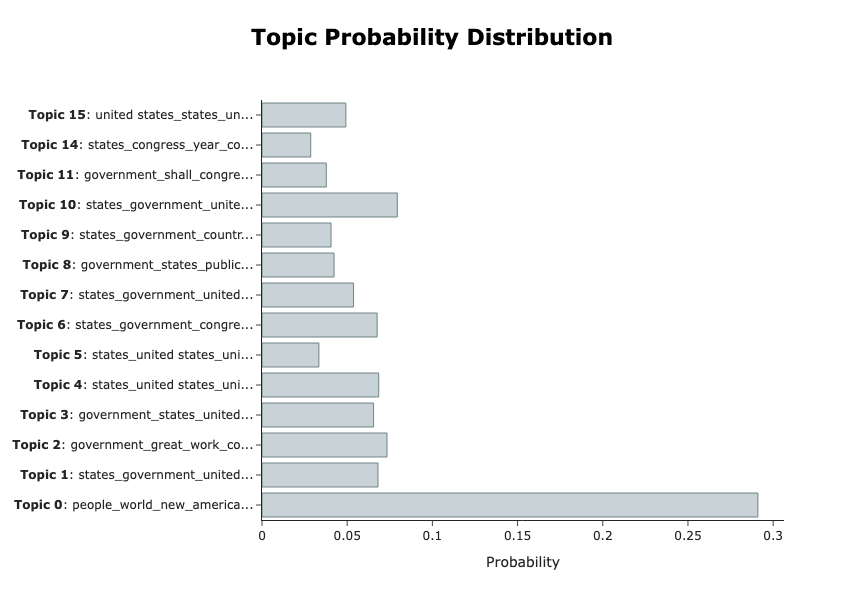

In [22]:
topic_distribution, _ = topic_model.approximate_distribution(docs)
topic_distribution[0]

first_speech_visualization = topic_model.visualize_distribution(topic_distribution[0])
first_speech_visualization.write_html("outputs/p3_first_speech_topic_distribution.html")
first_speech_visualization

The figure above shows the BERTopic topic probability distribution for the first speech in the dataset.
Each bar represents a topic, and the length of the bar indicates how much the topic contributes to the content of the speech (i.e., its probability weight).

From the plot, Topic 0 (“people_world_new_america…”) dominates the speech, accounting for nearly 30% of all topic proportions.
Other topics, although present, contribute much smaller portions, suggesting that the first speech heavily emphasizes themes about people, the world, and America, while topics related to government, congress, state affairs, etc. appear only marginally.

This helps identify which themes are most central in the speech rather than simply listing which words appear.

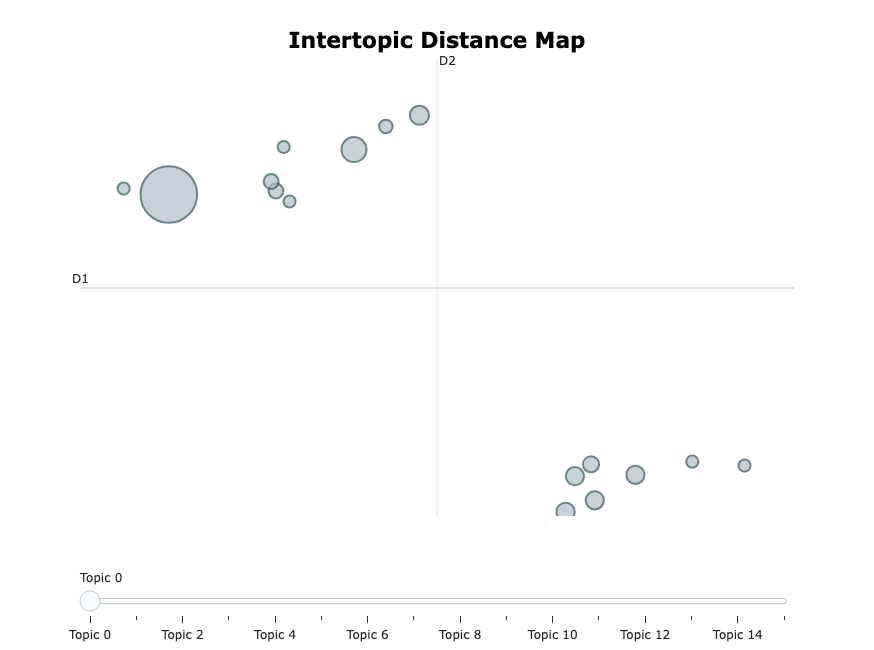

In [23]:
# run this cell to visualize the topics
topics_fig = topic_model.visualize_topics()
topics_fig.write_html("outputs/p3_intertopic_distance_map.html")
topics_fig

The intertopic distance map helps visualize how similar or different the BERTopic-derived topics are.
Each bubble represents a topic, and the bubble size reflects its overall prevalence across the corpus.
Topics positioned closer together share more overlapping vocabulary and semantic content, while topics that are farther apart are more distinct.

By hovering over each bubble, we can interactively inspect the representative words and see how the topic’s distribution changes. In our results, most topics cluster in the upper-left quadrant, indicating strong thematic similarity across speeches (e.g., government and national issues). A few topics are positioned farther away, suggesting more unique themes that occur less frequently in the corpus.